In [90]:
import tensorflow as tf
import keras
import retina
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics

In [91]:
df = pd.read_csv(retina.filesys.TRAINING_DATA_CSV_PATH, index_col=False)
labels = df["label"]
df = df.drop(columns=["label"])
df

,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,feature-10,...,feature-297,feature-298,feature-299,feature-300,feature-301,feature-302,feature-303,feature-304,feature-305,feature-306
0,0.005825,0.022776,0.005506,0.139276,0.204193,0.271745,0.202509,0.012700,0.029929,0.067263,...,0.245513,0.415541,0.455725,0.366279,0.365207,0.451183,0.412761,0.032191,0.013567,0.028173
1,0.006057,0.024495,0.005831,0.135748,0.206298,0.278846,0.207814,0.014730,0.028129,0.056646,...,0.243240,0.450517,0.457360,0.331739,0.330584,0.452952,0.430863,0.038436,0.008111,0.036909
2,0.005652,0.021504,0.005167,0.132024,0.192396,0.253781,0.192121,0.011895,0.028250,0.062848,...,0.211109,0.396377,0.424346,0.321639,0.307487,0.390304,0.336134,0.043101,0.016934,0.029235
3,0.007123,0.030141,0.007108,0.163145,0.247585,0.339624,0.252247,0.017627,0.023470,0.056308,...,0.306886,0.532608,0.513291,0.372802,0.372544,0.521386,0.546113,0.042390,0.011664,0.046723
4,0.006518,0.026438,0.005946,0.179819,0.270732,0.382089,0.273831,0.012804,0.028652,0.055455,...,0.368465,0.533560,0.569607,0.464356,0.475046,0.630132,0.659673,0.033560,0.013319,0.064047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0.005127,0.020233,0.004667,0.114672,0.172876,0.229138,0.173170,0.014172,0.033453,0.045680,...,0.265979,0.455556,0.508282,0.393935,0.394185,0.504738,0.442061,0.056325,0.027915,0.054738
408,0.005128,0.019079,0.004442,0.116480,0.170520,0.227997,0.173247,0.015047,0.036814,0.050290,...,0.263370,0.472672,0.532912,0.422463,0.414342,0.511644,0.447037,0.043307,0.029028,0.033089
409,0.005706,0.022919,0.005235,0.124414,0.185474,0.249678,0.189311,0.016395,0.035330,0.050379,...,0.276872,0.491697,0.536622,0.412930,0.405556,0.526631,0.477454,0.052344,0.021748,0.047295
410,0.005897,0.023913,0.005512,0.136271,0.206361,0.276046,0.208666,0.015567,0.035182,0.059018,...,0.299277,0.508481,0.557622,0.437243,0.435115,0.565695,0.514204,0.078612,0.029332,0.075480


In [92]:
dataset = tf.data.Dataset.from_tensor_slices((df, labels))
train_dataset, test_dataset = keras.utils.split_dataset(dataset, shuffle=True, seed=42, left_size=0.7)
train_dataset, validation_dataset = keras.utils.split_dataset(train_dataset, shuffle=True, seed=42, left_size=0.7)

train_dataset = train_dataset.repeat(5).shuffle(100).batch(16)
test_dataset = test_dataset.batch(16)
validation_dataset = validation_dataset.batch(16)

dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(306,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>

In [127]:
model = keras.Sequential([
  keras.layers.Input(shape=dataset.element_spec[0].shape),
  keras.layers.Dense(100, activation="sigmoid"),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(500, activation="sigmoid"),
  keras.layers.Dense(6, activation="softmax"),
])

model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.005), # type: ignore
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=["accuracy"],
)

model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_82 (Dense)                │ (None, 100)            │        30,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 500)            │        50,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 6)              │         3,006 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,206 (328.93 KB)

 Trainable params: 84,206 (328.93 KB)

 Non-trainable params: 0 (0.00 B)

In [128]:
history = model.fit(
  train_dataset, epochs=20,
  validation_data=validation_dataset,
  # callbacks=keras.callbacks.EarlyStopping(
  #   monitor='val_loss',
  #   min_delta=0,
  #   patience=2,
  #   verbose=0,
  #   mode='auto'
  # )
)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1994 - loss: 2.0861 - val_accuracy: 0.2093 - val_loss: 1.9805
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2281 - loss: 1.8657 - val_accuracy: 0.1977 - val_loss: 1.9570
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2267 - loss: 1.8463 - val_accuracy: 0.2674 - val_loss: 1.9111
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2848 - loss: 1.7524 - val_accuracy: 0.3140 - val_loss: 1.7510
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3098 - loss: 1.7312 - val_accuracy: 0.3256 - val_loss: 1.8035
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3140 - loss: 1.7238 - val_accuracy: 0.2791 - val_loss: 1.7485
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3406 - loss: 1.6634 - val_accuracy: 0.1744 - val_loss: 1.8164
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3275 - loss: 1.6475 - val_accuracy: 0.1512 - val_loss:

In [129]:
confidences = model.predict(test_dataset)
predictions = np.argmax(confidences, axis=1)

labels = list(test_dataset.unbatch().map(lambda x, y: y))
sklearn.metrics.classification_report(labels, predictions, output_dict=True, target_names=retina.face.FacialExpressionLabel.target_names())

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


d:\Davin\College\Semester7-DeepLearning\Venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Davin\College\Semester7-DeepLearning\Venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Davin\College\Semester7-DeepLearning\Venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

{'Angry': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 18.0},
 'Disgusted': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 16.0},
 'Happy': {'precision': 0.35,
  'recall': 0.9333333333333333,
  'f1-score': 0.509090909090909,
  'support': 30.0},
 'Neutral': {'precision': 0.25,
  'recall': 0.42105263157894735,
  'f1-score': 0.3137254901960784,
  'support': 19.0},
 'Sad': {'precision': 0.6666666666666666,
  'recall': 0.4,
  'f1-score': 0.5,
  'support': 20.0},
 'Surprised': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 21.0},
 'accuracy': 0.3548387096774194,
 'macro avg': {'precision': 0.2111111111111111,
  'recall': 0.2923976608187135,
  'f1-score': 0.22046939988116457,
  'support': 124.0},
 'weighted avg': {'precision': 0.23051075268817203,
  'recall': 0.3548387096774194,
  'f1-score': 0.2518831579552642,
  'support': 124.0}}

In [96]:
model.save(retina.filesys.EXPRESSION_RECOGNITION_MODEL_PATH)

C:\Users\Davin Tristan\AppData\Local\Temp\ipykernel_3372\469801421.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  accuracy_fig.show()


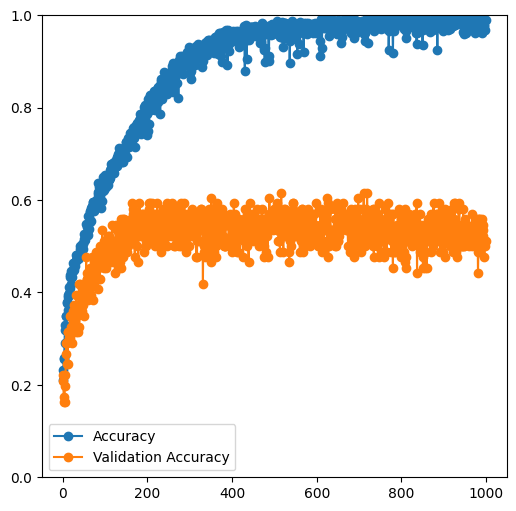

In [126]:
accuracy_fig = plt.figure(figsize=(6,6))
ax = accuracy_fig.add_subplot()
ax.plot(history.history["accuracy"], label="Accuracy", marker='o')
ax.plot(history.history["val_accuracy"], label="Validation Accuracy", marker='o')
ax.legend()
ax.set_ylim(0, 1)
accuracy_fig.show()